In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
import scipy.linalg

from k4 import *

plt.rc("text", usetex=False)
plt.rc("font", family = "serif",size=14)
plt.rc("figure",figsize=(12,10))
%config InlineBackend.figure_format = 'retina'

In [9]:
# equilibrium parameters

labels_f, labels_r = eq_params_k4()
print(labels_f)
print(labels_r)

[254.0, 0.003612, 13.1, 104.6]
[202.6, 0.2223, 0.002687, 10388.14177839238]


In [10]:
labels_f_eq = labels_f.copy()
labels_r_eq = labels_r.copy()

print(labels_f_eq)
print(labels_r_eq)

[254.0, 0.003612, 13.1, 104.6]
[202.6, 0.2223, 0.002687, 10388.14177839238]


In [11]:
aff = np.abs(np.log(np.prod(labels_f_eq)/np.prod(labels_r_eq)))
print(aff)

0.0


In [12]:
# autocorr settings
signal = [3,5,7,9]
alpha, beta  = 1, 3

In [13]:
# arrays for tracking aff, area, and eigs
N = 2000
affinities = np.empty(N, dtype=float)
areas = np.empty(N, dtype=float)
eigvals_all_r = np.zeros((N, 4), dtype=float)
eigvals_all_c = np.zeros((N, 4), dtype=float)

# edge to perturb
edge_idx = 1
perturb_edge = labels_f_eq[edge_idx] # labels_f[1] = k23

for i in tqdm(range(0,N)):
    
    labels_f_eq[edge_idx] = perturb_edge
    
    lap = lap_k4(labels_f_eq, labels_r_eq)
    
    aff = np.abs(np.log(np.prod(labels_f_eq)/np.prod(labels_r_eq)))
    affinities[i] = aff
    
    tau, _ = define_tau_range(lap, max_points=500, cap_factor=10.0)
    a13, a31 = autocorrelation_analytical(signal,lap,tau,alpha=1,beta=3)
    areas[i] = np.abs(np.trapezoid(a13)-np.trapezoid(a31))
    
    # Track eigenvalues (real part)
    eigvals = scipy.linalg.eigvals(lap)
    eigvals_all_r[i, :] = np.sort(eigvals.real)
    eigvals_all_c[i, :] = np.sort(eigvals.imag)
    
    perturb_edge *= 1.01

100%|██████████████████████████████████████| 2000/2000 [00:16<00:00, 118.32it/s]


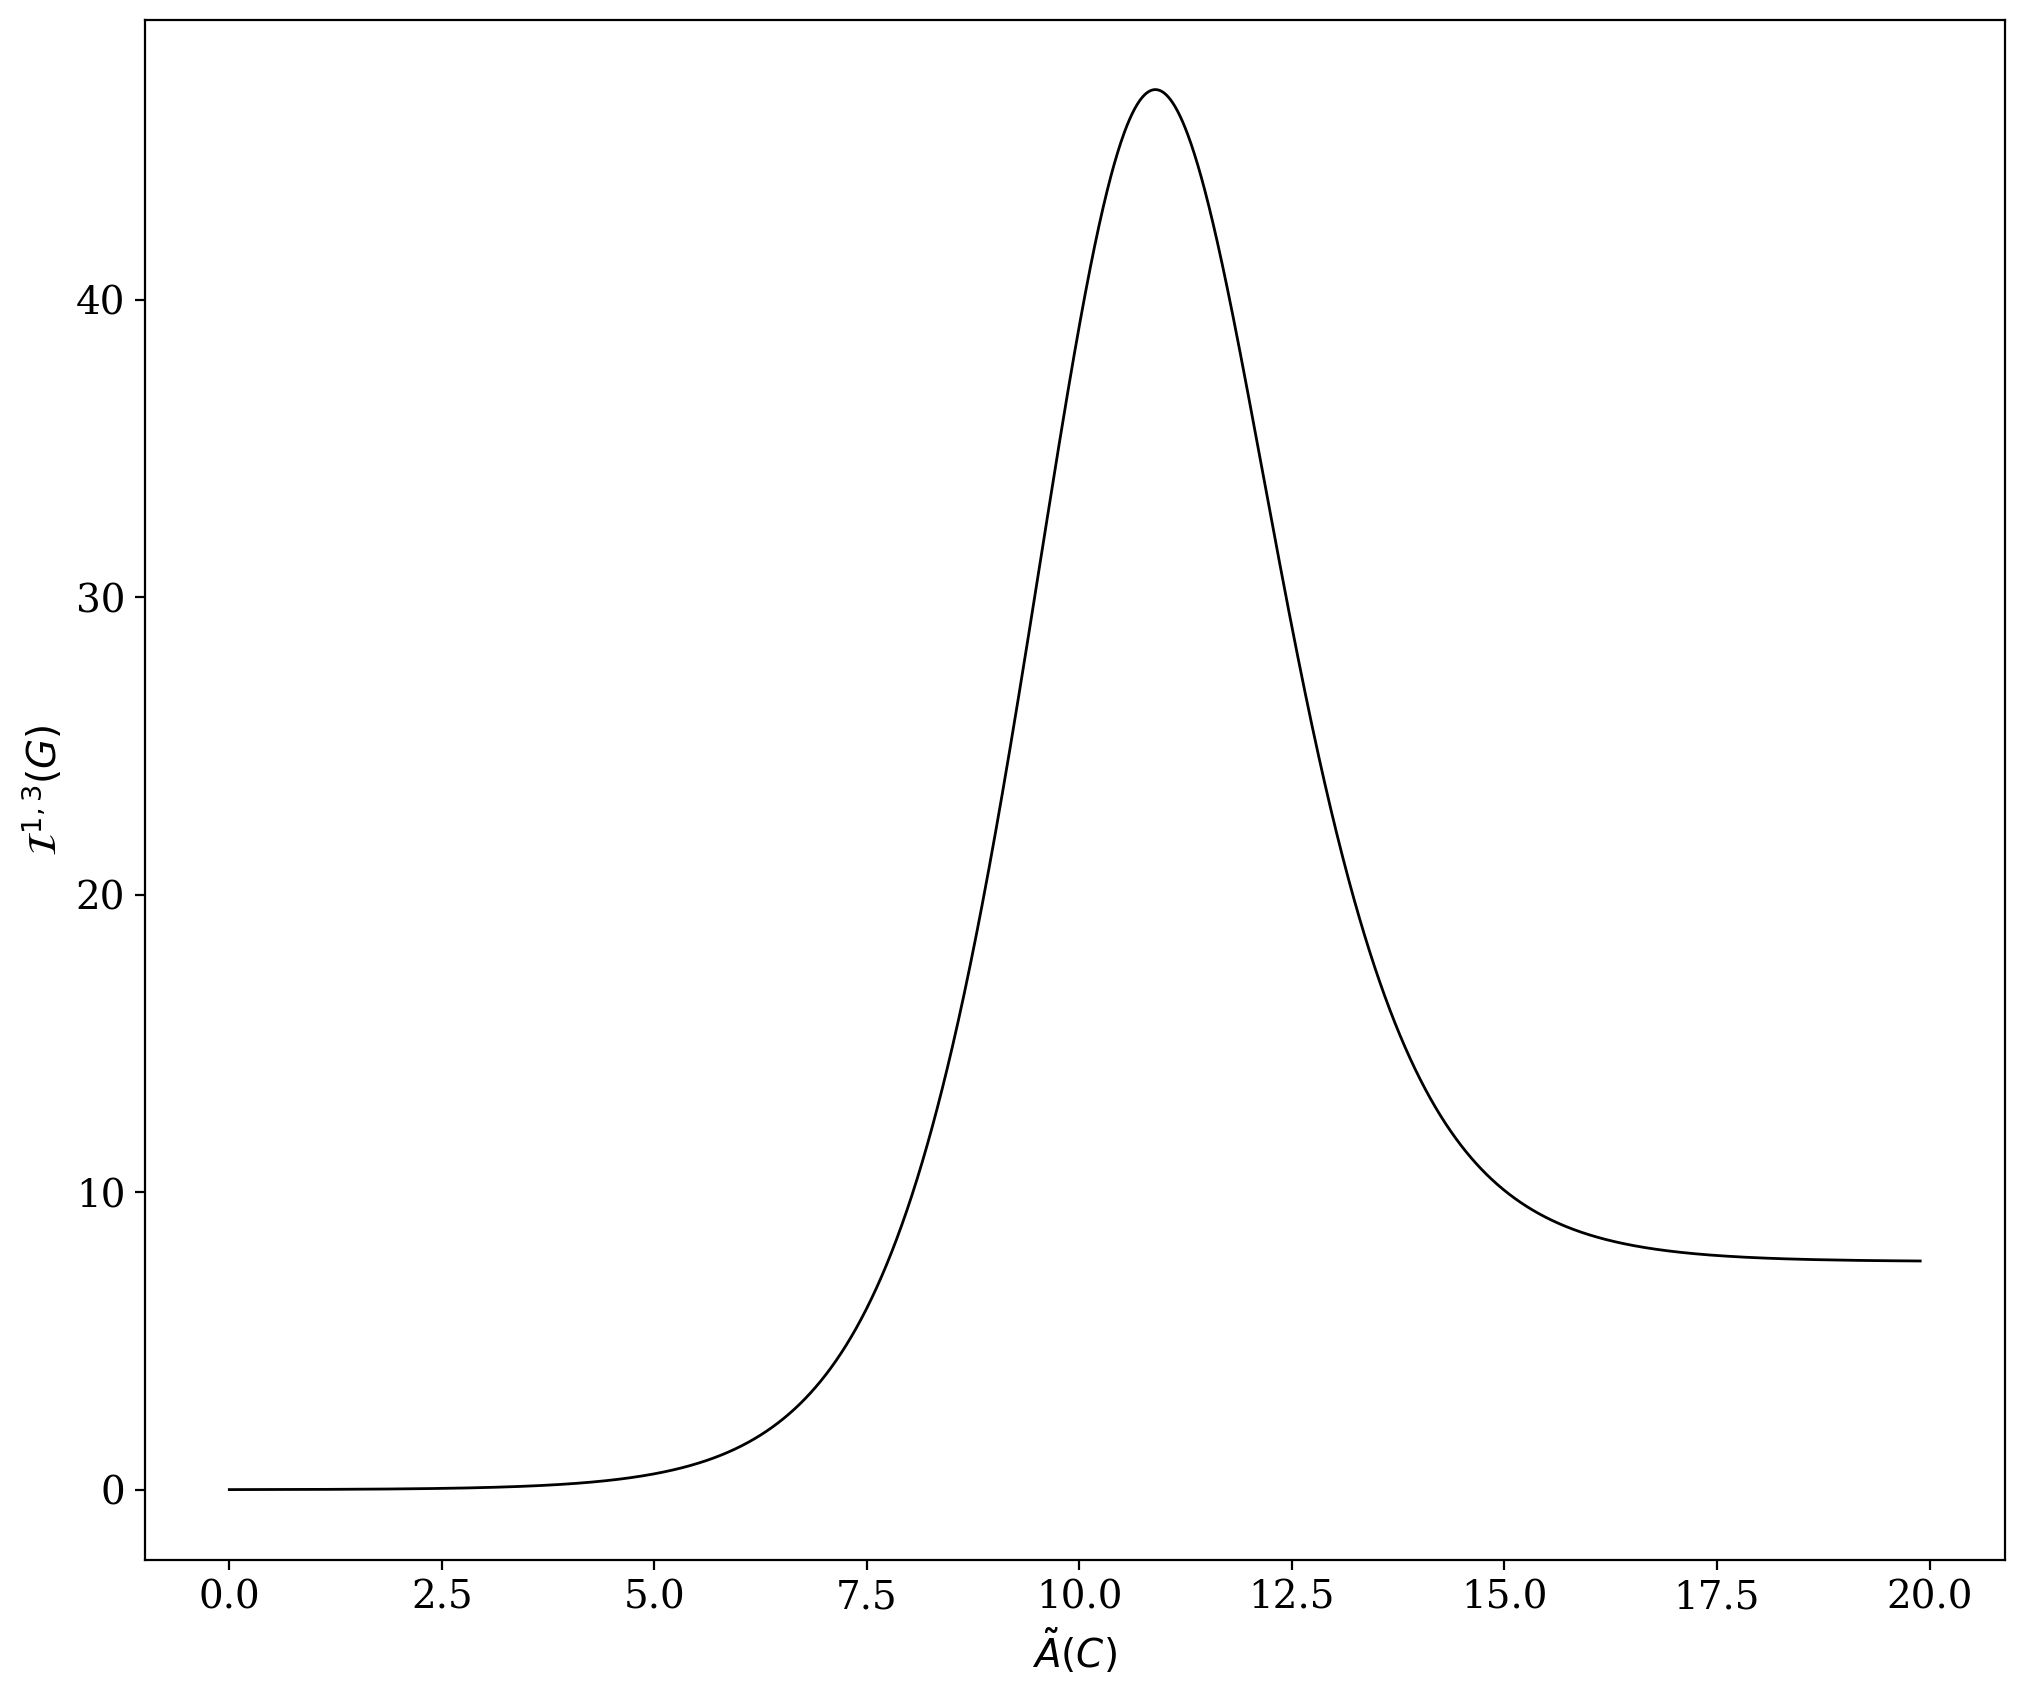

In [14]:
# Steinberg curve plot
plt.plot(np.abs(affinities),areas,label=r'$\mathcal{I}^{1,3}(G)$',linewidth=1, color= 'black')
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()

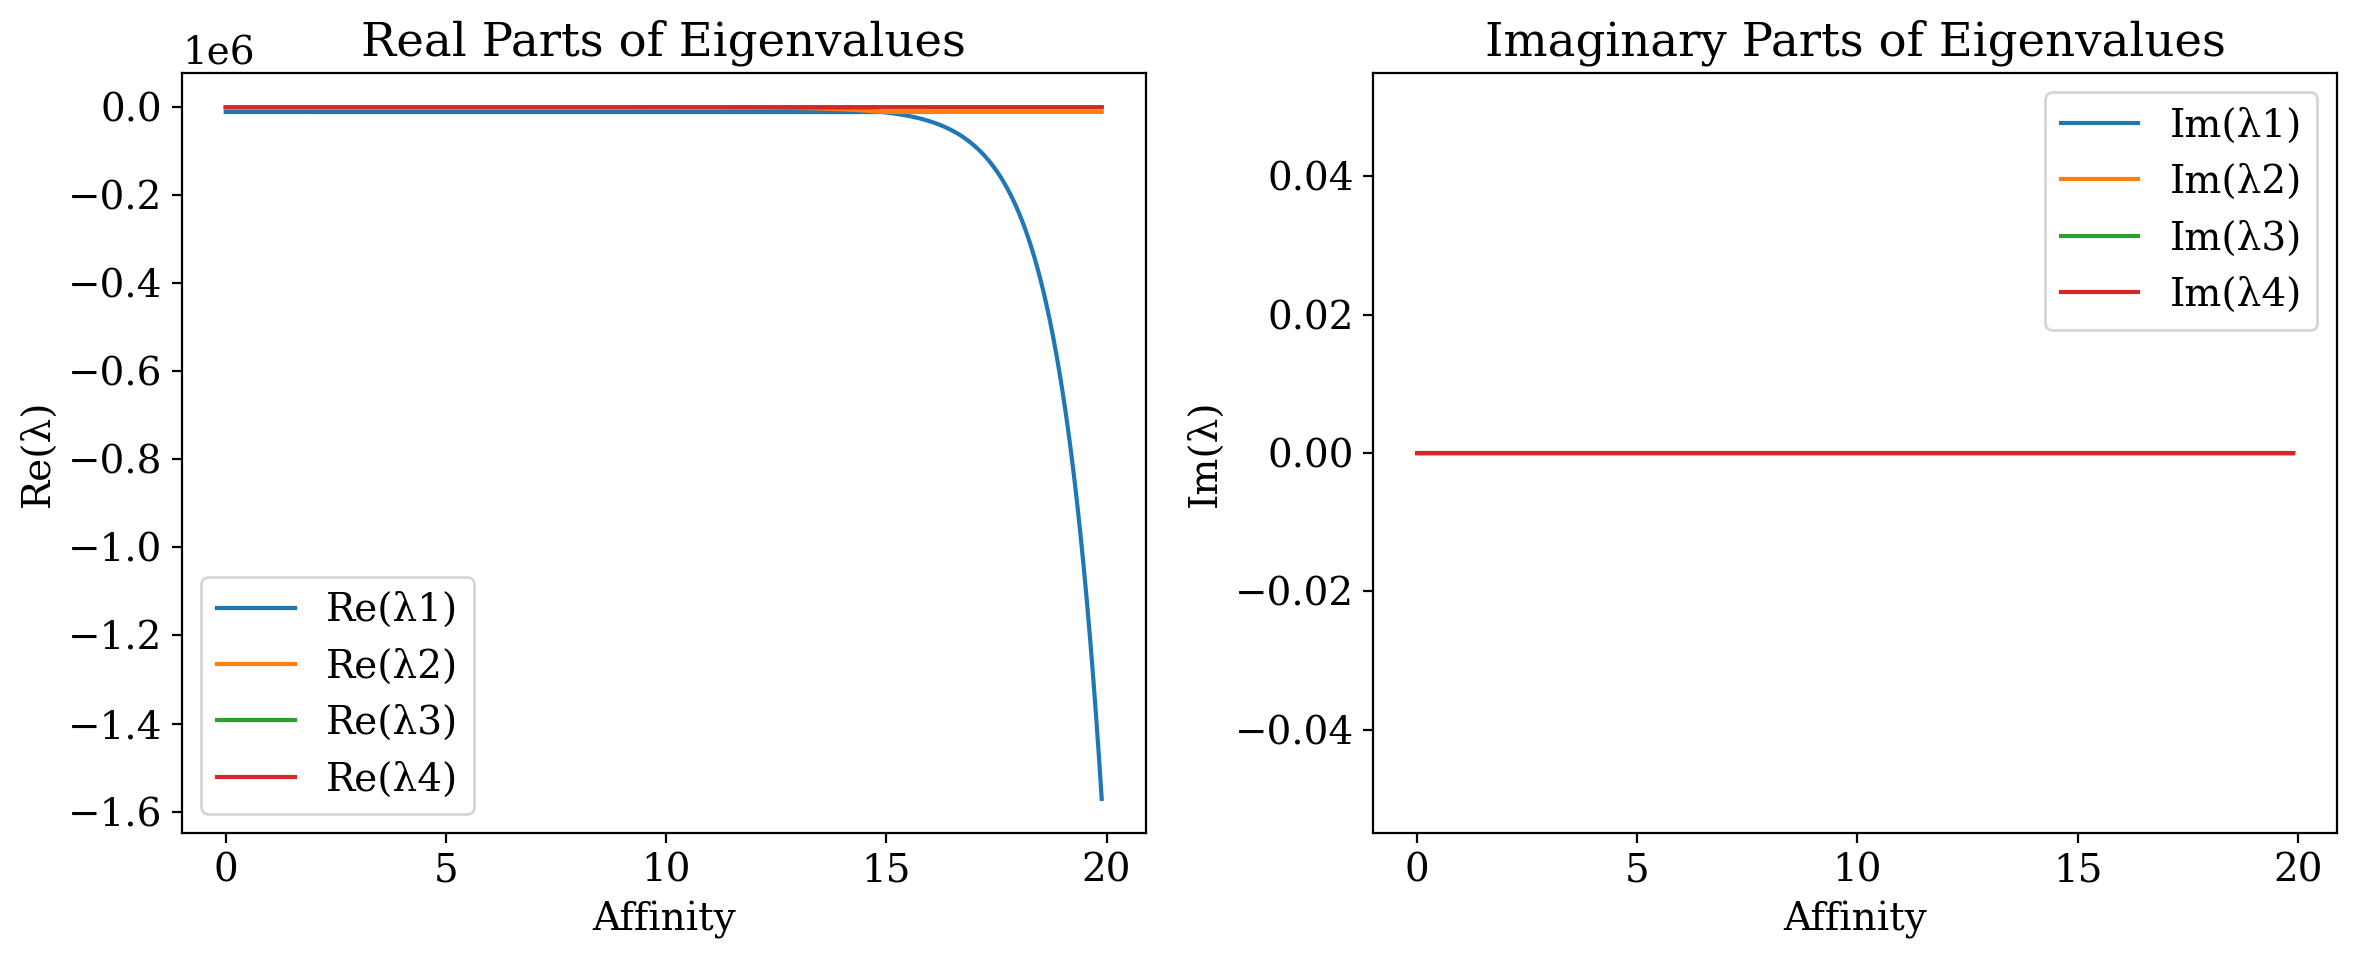

In [15]:
# Eigenvalues plots
plt.figure(figsize=(12,5))

# Real part
plt.subplot(1,2,1)
for j in range(4):
    plt.plot(affinities, eigvals_all_r[:, j], label=f"Re(λ{j+1})")
plt.xlabel("Affinity")
plt.ylabel("Re(λ)")
plt.title("Real Parts of Eigenvalues")
plt.legend()

# Imaginary part
plt.subplot(1,2,2)
for j in range(4):
    plt.plot(affinities, eigvals_all_c[:, j], label=f"Im(λ{j+1})")
plt.xlabel("Affinity")
plt.ylabel("Im(λ)")
plt.title("Imaginary Parts of Eigenvalues")
plt.legend()

plt.tight_layout()
#plt.savefig(f"eigenvalue_evolution_edge_{edge_idx}.png", dpi=300)
plt.show()

In [16]:
def spectrum_any(lap):
    lambdas, w_i, z_i = scipy.linalg.eig(lap, left=True,right=True)
    return lambdas, w_i, z_i

lambdas, w_i, z_i = spectrum_any(lap)

In [17]:
print(lambdas)

[-1.57119471e+06+0.j -1.07442333e+04+0.j -1.35315401e-08+0.j
 -1.55782131e+01+0.j]


In [18]:
print(w_i)

[[ 1.62762931e-04  9.99951667e-01  5.00000000e-01  1.12156324e-01]
 [-9.99999987e-01  1.41907202e-04  5.00000000e-01 -6.96392557e-01]
 [ 1.41485980e-07  1.19980992e-05  5.00000000e-01 -6.96489924e-01]
 [-1.08364268e-08 -9.83069321e-03  5.00000000e-01  1.31757926e-01]]


In [19]:
print(z_i)

[[ 9.18066827e-05  7.15419002e-01  9.65434154e-03  6.92591125e-03]
 [-7.07149429e-01  1.16448852e-04  1.58723489e-06  1.01912479e-06]
 [ 7.07064125e-01 -1.70477903e-02  1.87367973e-01 -7.10544804e-01]
 [-6.50264477e-06 -6.98487660e-01  9.82242351e-01  7.03617874e-01]]
